## Assignment 33, Numerical integration of simple harmonic oscillator equations of motion

Euler's method uses the following iterative update rule: 

$$y_{n+1} = y_{n} + hf(x_{n}, y_{n})$$. 

where $x_{n} = x_{0} + nh$ for $n \in \mathbb{N}$. 

Here is the meaning of the above. Let $y'(x) = f(x, y)$ be an ode of the first order (not necessarily linear), and suppose that $y(x_{0}) = y_{0}$. Then we obtain a local linear approximation to the value of the unknown function $y$ about $x_{0}$ as 

$$y = y_{0} + \Delta xf(x_{0}, y_{0})$$

$h$ - or $\Delta x$ - is the *step size*. It denotes a certain distance along the axis of the independent variable. Given the ODE and a point on the (unkown) curve $y$, we reach the approximate next $y$ value by starting at $y_{0}$, and then travelling $h$ times the *slope* of the curve as given by the value of its derivative evaluated at the point $(x_{0}, y_{0})$. This, of course, gives us a new point: $(x_{1}, y_{1})$, where $x_{1} = x_{0} + h$ and $y_{1} = y_{0} + hf(x_{0}, y_{0})$. 

The process above can be repeated. In order to make progress, we essentially tell a small lie. The price we pay for the small lie we tell is that we have to resign ourselves to an appoximate value for each $y_{n}$ for $n \geq 1$. The lie is this: we next calculate the slope of the tangent line at the point $(x_{1}, y_{1})$. This is a fiction, since the point in question doesn't actually belong to the unknonwn curve $y$. But we can think of $f(x_{1}, y_{1})$ as coming from one of the infnitely many curves in the family of curves comprising the general solution to the differential equation we started with. For a small enough step size, this curve will be 'close to' the actual curve, and so the slope of the line tangent to it at the point $(x_{1}, y_{1})$ will in general be a good guide to the direction we ought to move in order to rach the next (approximate) point on the correct curve. 

As an example, suppose that $y' = 0.1\sqrt{y} + 0.4x^{2}$ and that $y(2) = 4$. 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")
from tabulate import tabulate


def y(y0, x0, h, f):
    """
    euler's method update rule:

    y0: float
        previous y value
    x0: float
        previous x value
    h: float
        step size
    f: function
        float --> float
        y' = f(x, y)
    """
    return y0 + h * f(x0, y0)


def f(x, y):
    return 0.1 * math.sqrt(y) + 0.4 * x**2


X = np.linspace(2.0, 2.5, 6)


Y = [4]

for i in range(0, len(X)):
    Y.append(round(y(Y[i], X[i], 0.1, f), 4))

table = list(zip(X, Y))

print(tabulate(table, headers="XY", tablefmt="fancy_grid"))


X = np.linspace(2.0, 2.5, 11)

Y = [4]

for i in range(0, len(X)):
    Y.append(round(y(Y[i], X[i], 0.05, f), 4))

table = list(zip(X, Y))

print(tabulate(table, headers="XY", tablefmt="fancy_grid"))

╒═════╤════════╕
│   X │      Y │
╞═════╪════════╡
│ 2   │ 4      │
├─────┼────────┤
│ 2.1 │ 4.18   │
├─────┼────────┤
│ 2.2 │ 4.3768 │
├─────┼────────┤
│ 2.3 │ 4.5913 │
├─────┼────────┤
│ 2.4 │ 4.8243 │
├─────┼────────┤
│ 2.5 │ 5.0767 │
╘═════╧════════╛
╒══════╤════════╕
│    X │      Y │
╞══════╪════════╡
│ 2    │ 4      │
├──────┼────────┤
│ 2.05 │ 4.09   │
├──────┼────────┤
│ 2.1  │ 4.1842 │
├──────┼────────┤
│ 2.15 │ 4.2826 │
├──────┼────────┤
│ 2.2  │ 4.3854 │
├──────┼────────┤
│ 2.25 │ 4.4927 │
├──────┼────────┤
│ 2.3  │ 4.6045 │
├──────┼────────┤
│ 2.35 │ 4.721  │
├──────┼────────┤
│ 2.4  │ 4.8423 │
├──────┼────────┤
│ 2.45 │ 4.9685 │
├──────┼────────┤
│ 2.5  │ 5.0997 │
╘══════╧════════╛


We can proceed in an analagous way in the event that the unknown function is a vector-valued function of time: 

$$\mathbf{x'} = \frac{d\mathbf{x}(t)}{dt} = \mathbf{f}(t, \mathbf{x}(t))$$

with initial conditions given by $t = t_{0}, \mathbf{x}_{0} = \mathbf{x}(t_{0})$. 

The update rule for obtaining the next approximate value of the unknown function $\mathbf{x}$ from the previous value and the slope of the (approx) tangent at the previous point can then be written as: 

$$\mathbf{k}_{n} = \Delta t \mathbf{f}(t_{n - 1}, \mathbf{x}_{n - 1})$$

$$\mathbf{x}_{n + 1} = \mathbf{x}_{n} +  \mathbf{k}_{n}$$

where $t_{n} = t_{0} + n\Delta t$. 

As a particular example, consider the dimensionless form of the Hamiltonian of the simple harmonic oscilator:

$$\mathcal{H} = \frac{1}{2}x^{2} + \frac{1}{2}p^{2} $$ where $x$ and $p$ are dimensionless position and momentum. 

The equations of motion are then given by:

$$\begin{equation}
    \begin{cases}
        \frac{dx}{dt} = \frac{\partial \mathcal{H}}{\partial p} = p\\
        \frac{dp}{dt} = -\frac{\partial \mathcal{H}}{\partial x} = -x
    \end{cases}
\end{equation}$$

So let, 

$$\mathbf{x}(x_{1}, x_{2}) = \mathbf{x}(x, p)$$. 

Then 

$$\mathbf{f}(f_{1}, f_{2}) = \mathbf{f}(x_{2}, -x_{1}) = \mathbf{f}(p, -x)$$.

Now, for simple harmonic motion, we know that $x$ is a sinusoidal function of $t$. WLOG, then, let us assume that 

$$x(t) = \cos(t)$$

Then we also have, from the equations of motion above, that

$$p(t) = -\sin(t)$$

The above both clearly have periods of $\Delta t = 2\pi$. 

We take here the 'natural' set of initial conditons: $t_{0} = 0, x_{0} = cos(t_{0}) = 1, p_{0} = -sin(t_{0}) = 0$. This set of initial conditions represents the case wherein we have 'streched' the 'spring' to its fullest extent (here, $1$ 'unit' from its unperturbed position) and not yet released it. 

Note that, with these choices of $x$ and $p$, the equation expressing the hamiltonian becomes: 

$$\mathcal{H} = \frac{1}{2}\cos^{2}(t) + \frac{1}{2}\sin^{2}(t)$$

which is the parametric equation of a circle in $x - p$ space, centered at the origin and with radius $r = \frac{1}{2}$. 

       tf - ti = 2pi
╒══════════╤══════════════╕
│        x │            p │
╞══════════╪══════════════╡
│  1       │ -0           │
├──────────┼──────────────┤
│  1       │ -6.28319     │
├──────────┼──────────────┤
│ -5.28319 │ -6.28319     │
├──────────┼──────────────┤
│ -5.28319 │ -1.77636e-15 │
├──────────┼──────────────┤
│  1       │  1.51558e-14 │
╘══════════╧══════════════╛


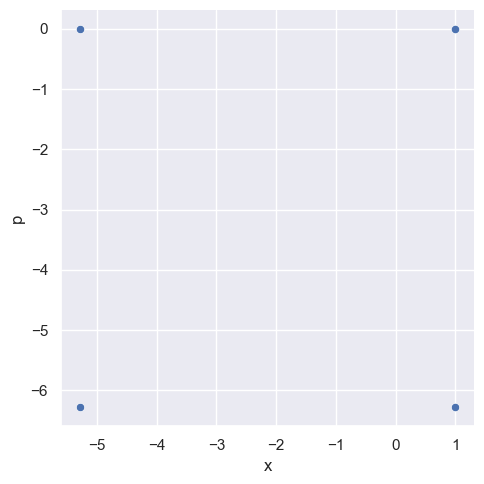


   tf - ti = pi
╒═════╤══════════╕
│   x │        p │
╞═════╪══════════╡
│   1 │ -0       │
├─────┼──────────┤
│   1 │ -2.85599 │
├─────┼──────────┤
│   1 │  0       │
├─────┼──────────┤
│   1 │ -2.85599 │
├─────┼──────────┤
│   1 │  0       │
├─────┼──────────┤
│   1 │ -2.85599 │
├─────┼──────────┤
│   1 │  0       │
├─────┼──────────┤
│   1 │ -2.85599 │
├─────┼──────────┤
│   1 │  0       │
├─────┼──────────┤
│   1 │ -2.85599 │
├─────┼──────────┤
│   1 │  0       │
╘═════╧══════════╛


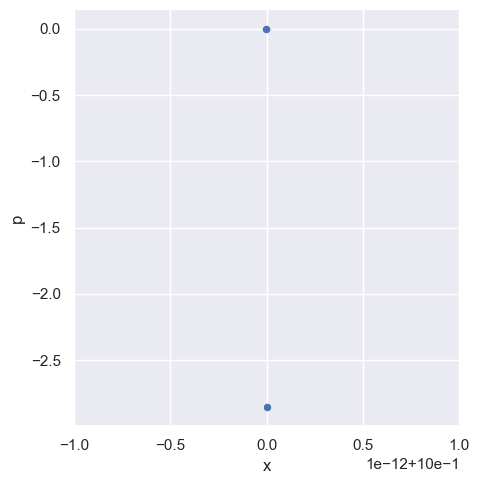


        tf - ti = pi/2
╒════════════╤══════════════╕
│          x │            p │
╞════════════╪══════════════╡
│  1         │ -0           │
├────────────┼──────────────┤
│  1         │ -1.36591     │
├────────────┼──────────────┤
│ -0.352007  │ -1.5603      │
├────────────┼──────────────┤
│ -0.736828  │ -0.249718    │
├────────────┼──────────────┤
│  0.505647  │  0.317701    │
├────────────┼──────────────┤
│  1.24411   │ -0.831375    │
├────────────┼──────────────┤
│  0.211828  │ -1.72586     │
├────────────┼──────────────┤
│ -0.820458  │ -0.831375    │
├────────────┼──────────────┤
│ -0.0819912 │  0.317701    │
├────────────┼──────────────┤
│  1.16048   │ -0.249718    │
├────────────┼──────────────┤
│  0.775663  │ -1.5603      │
├────────────┼──────────────┤
│ -0.576344  │ -1.36591     │
├────────────┼──────────────┤
│ -0.576344  │  1.33227e-15 │
├────────────┼──────────────┤
│  0.775663  │  0.194389    │
├────────────┼──────────────┤
│  1.16048   │ -1.11619     │
├────────────┼──

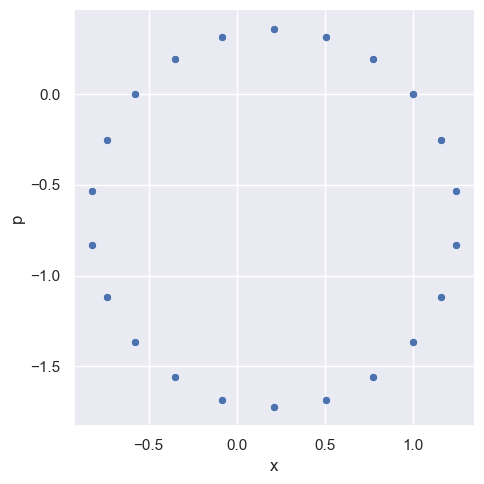


                  X vs P for tf - ti = pi/20,000


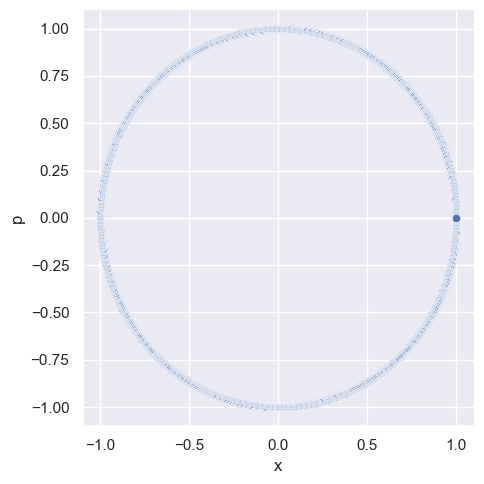

In [2]:
def x1(t):
    return math.cos(t)


def x2(t):
    return -math.sin(t)


def f1(t):
    return x2(t)


def f2(t):
    return -x1(t)


def euler(ti, tf, dt, x1, x2, f1, f2):
    """
    ti: float
        initial time
    tf: float
        final time
    dt: int
        determiner of size of time increments
    x1: function: float --> float
        first component of X
    x2: function: float --> float
        second component of X
    f1: function: float --> float
        first component of F
    f2: function: float --> float
        second component of F
    """
    t = np.linspace(ti, tf, dt)
    X = [np.array([x1(t[0]), x2(t[0])])] * len(t)
    F = [None] * len(t)
    for i in range(1, len(t)):
        # present value of f is obtained by evaluating
        # its compents at the previous time step
        f = np.array([f1(t[i - 1]), f2(t[i - 1])])
        F[i - 1] = f
        k = (tf - ti) / dt * F[i - 1]
        x = X[i - 1] + k
        X[i] = x
    return X


table = euler(0.0, 10 * math.pi, 5, x1, x2, f1, f2)

print("       tf - ti = 2pi")
print(tabulate(table, headers="xp", tablefmt="fancy_grid"))
fig1 = sns.relplot(data=pd.DataFrame(table, columns=["x", "p"]), x="x", y="p")
plt.show()
plt.close()

table = euler(0.0, 10 * math.pi, 11, x1, x2, f1, f2)

print("\n   tf - ti = pi")
print(tabulate(table, headers="xp", tablefmt="fancy_grid"))
fig2 = sns.relplot(data=pd.DataFrame(table, columns=["x", "p"]), x="x", y="p")
plt.show()
plt.close()

table = euler(0.0, 10 * math.pi, 23, x1, x2, f1, f2)

print("\n        tf - ti = pi/2")
print(tabulate(table, headers="xp", tablefmt="fancy_grid"))
fig3 = sns.relplot(data=pd.DataFrame(table, columns=["x", "p"]), x="x", y="p")
plt.show()
plt.close()

table = euler(0.0, 10 * math.pi, 10000, x1, x2, f1, f2)

print("\n                  X vs P for tf - ti = pi/20,000")
fig4 = sns.relplot(data=pd.DataFrame(table, columns=["x", "p"]), x="x", y="p")
plt.show()
plt.close()

Now, all of the energy which is not *potential* is entirely kinetic (i.e., it is energy of *motion*, associated with and deriving from the momentum of the oscillator at each instant of time). Thus, we have it that the kinetic energy of the oscillator as a function of time, $t$ is given by the second term in the expression for the hamiltonian above: 

$$KE = \frac{1}{2}p(t)^{2}$$

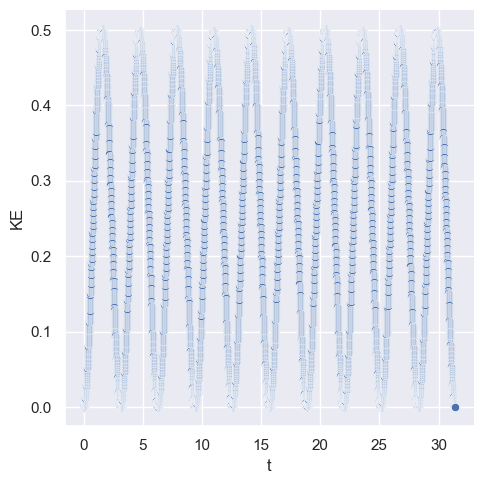

In [3]:
P = 0.5 * np.array([table[i][-1] ** 2 for i in range(len(table))])

TP = list(zip(np.linspace(0, 10 * math.pi, 10000), P))

fig5 = sns.relplot(data=pd.DataFrame(TP, columns=["t", "KE"]), x="t", y="KE")
plt.show()
plt.close()

The total energy is given by the sum of the terms in the expression for the hamiltonian:
    
$$E = \frac{1}{2}x(t)^{2} + \frac{1}{2}p(t)^{2}$$

[0.5 0.5 0.5 ... 0.5 0.5 0.5]


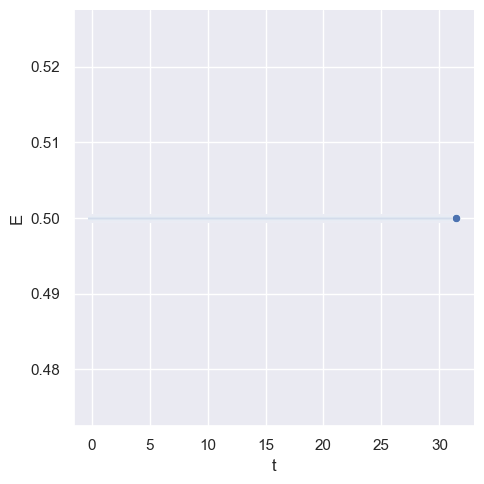

In [4]:
E = 0.5 * np.array([round((table[i][0]**2 + table[i][-1]**2), 2) for i in range(len(table))])
print(E)

TE = list(zip(np.linspace(0, 10 * math.pi, 10000), E))

fig6 = sns.relplot(data=pd.DataFrame(TE, columns=["t", "E"]), x="t", y="E")
plt.show()
plt.close()